<div id="header">
        <p style="float: left; width: 34%; text-align: left;">VIDHI JATIN SHAH</p>
    <h1 style="float: left; width: 33%; text-align: center;">LAB 2-Activity 3</h1>
    <p style="float: left; width: 33%; text-align: right;">UBPerson No:50207090</p>
</div>

In [32]:
library("RSQLite")
library("dplyr")
library("sqldf")
library(plyr)
library("ggplot2")

In [ ]:
data<- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv",head=TRUE,sep=",")

<b>Question 1:</b> Is playing video games more with male and younger generation?

<b>Hypothesis:</b> More number of males should be playing video games and specifically in the younger generation

In [34]:
game<-sqldf("select (game1) as Videogames ,sex,
(case when age BETWEEN 18 AND 40 then '18-40' 
   when age BETWEEN 41 AND 60 then '41-60'
  when age BETWEEN 61 AND 100 then '61-100' end) as Age from data where game1==1  ")

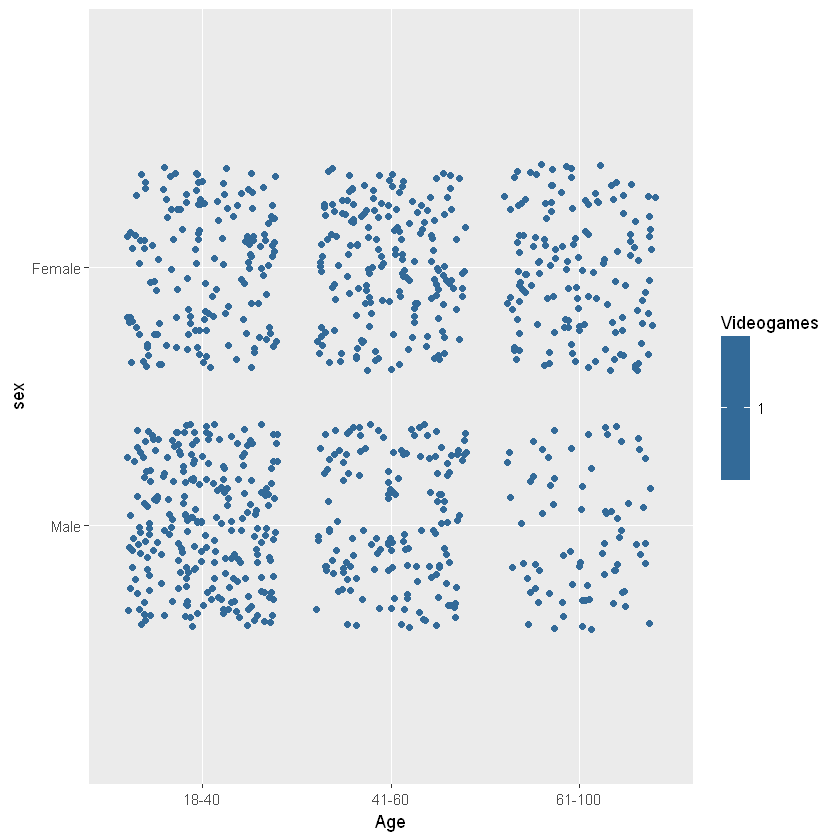

In [35]:
qplot(Age, sex,colour = Videogames, data=game, geom="jitter")+scale_y_discrete(limits=c("1","2"),labels=c("Male","Female"))

<b>Observation :</b>  As we can see almost equal number of Females play video games as male.
    Also we can see dense clustring of points in the age group of 18-40 which proves younger generation play more video games.
    
----------------------------------------------------------------------------------------------------------------------------

<b>Question 2:</b> How does the highest level of education achieved depend on the locality(urban,rural,suburban)?

<b>Hypothesis:</b> People in suburban areas should be more educated as compared urban and rural and the ones in the urban should be more educated than rural.So the people of rural areas are supposed to be the least educated ones.

In [36]:
edu<-sqldf("select educ2 as Education,
  sum(case when usr='U' then 1  end) as urban_count,
  sum(case when usr='R' then 1  end) as rural_count,
  sum(case when usr='S' then 1  end) as suburban_count
from data where educ2 != 98 and educ2!=99
group by educ2")

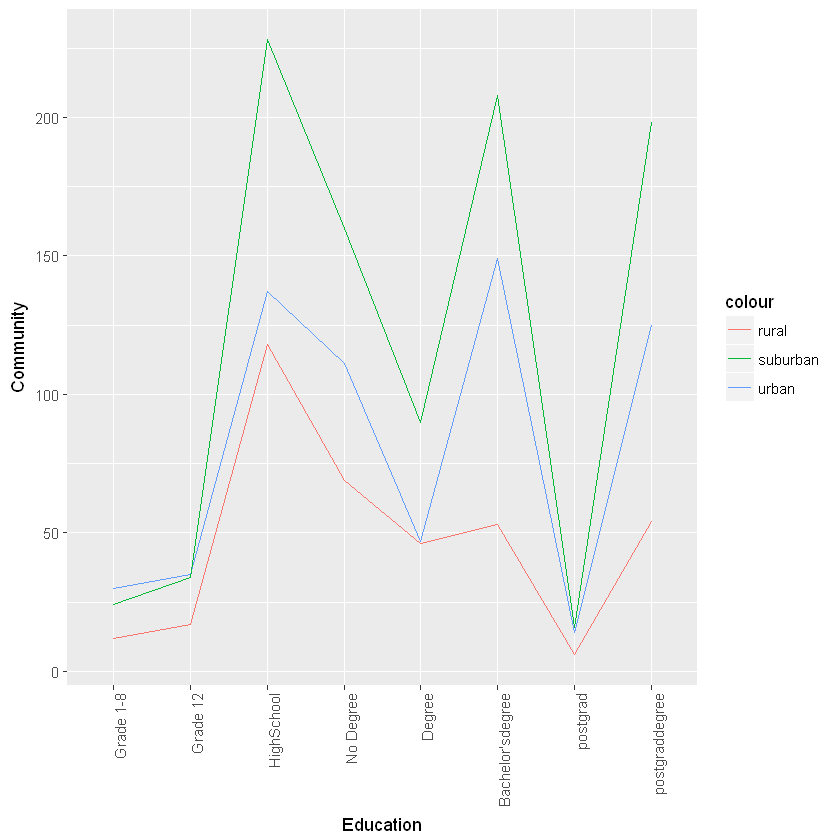

In [37]:
ggplot(data = edu, aes(x = Education)) + scale_x_discrete(limits=c("1","2","3","4","5","6","7","8"),labels=c("Grade 1-8", "Grade 12", "HighSchool","No Degree","Degree","Bachelor'sdegree","postgrad","postgraddegree"))+
 
geom_line(aes(y = urban_count,colour="urban"))+
    geom_line(aes(y = rural_count,colour="rural"))+
geom_line(aes(y = suburban_count,colour="suburban")) +ylab("Community")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

<b>Observation :</b> As seen above the highest level of education achieved is as expected, Suburban,urban and rural in descending order.

--------------------------------------------------------------------------------------------------------------------------------

<b>Question 3:</b>How does Employment vary with Race?

<b>Hypothesis:</b> Employment should be more with whites as compared to other races.

In [38]:
emp<-sqldf("select emplnw,
  sum(case when race=1 then 1  end) white,
  sum(case when race=2 then 1  end) black,
  sum(case when race=3 then 1  end) asian,
  sum(case when race=4 then 1  end) mixed,
  sum(case when race=5 then 1  end) nativeAmerican,
  sum(case when race=6 then 1  end) others
from data where emplnw!=98 and emplnw!=99
group by emplnw")

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 3 rows containing missing values (geom_path)."

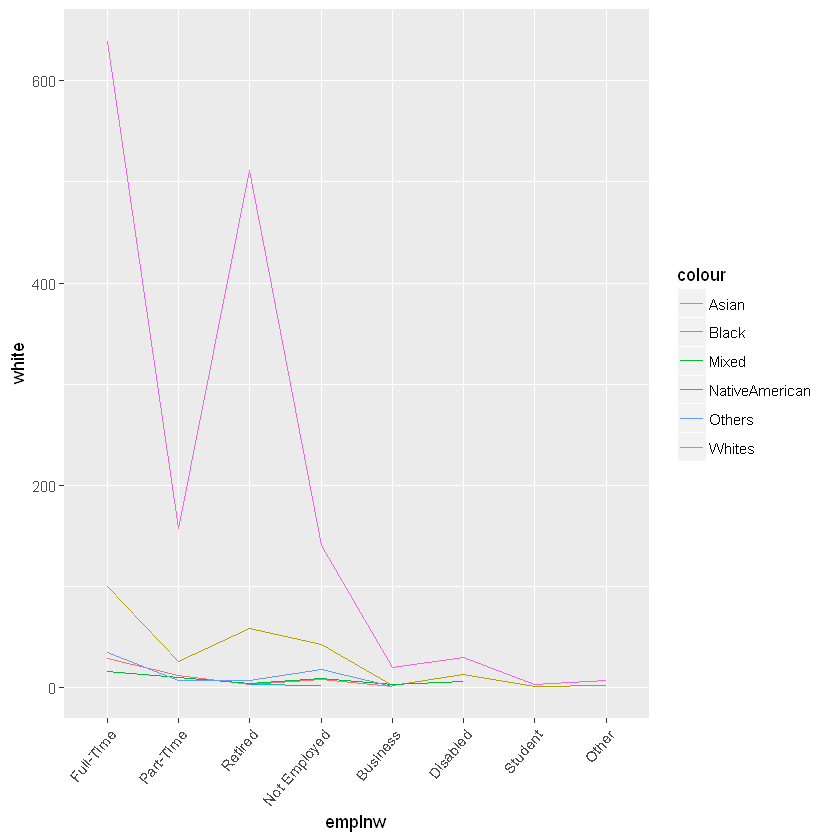

In [39]:
ggplot(data = emp, aes(x = emplnw)) + scale_x_discrete(limits=c("1","2","3","4","5","6","7","8"),labels=c("Full-Time", "Part-Time", "Retired","Not Employed","Business","Disabled","Student","Other"))+
  geom_line(aes(y = white,colour="Whites"))+
    geom_line(aes(y = black,colour="Black"))+
geom_line(aes(y = asian,colour="Asian"))+
geom_line(aes(y = mixed,colour="Mixed"))+
geom_line(aes(y = nativeAmerican,colour="NativeAmerican"))+
geom_line(aes(y = others,colour="Others"))+theme(axis.text.x = element_text(angle = 50, hjust = 1))

<b>Observation :</b> We can see that the employment ratio of whites to others for full time is very high which proves that more whites are emlployed full-time.

--------------------------------------------------------------------------------------------------------------------------------

<b>Question 4:</b> Which age group use online dating site the most?

<b>Hypothesis:</b> Younger generation are more likely to use online the dating  site

In [40]:
date<-sqldf("select date1a,
 (case when age BETWEEN 19 AND 40 then '19-40'  
   when age BETWEEN 41 AND 60 then '41-60'
  when age BETWEEN 61 AND 100 then '61-100' end) as AgeGroup
from data where date1a!=8 and date1a!=9 and AgeGroup!='NA'")

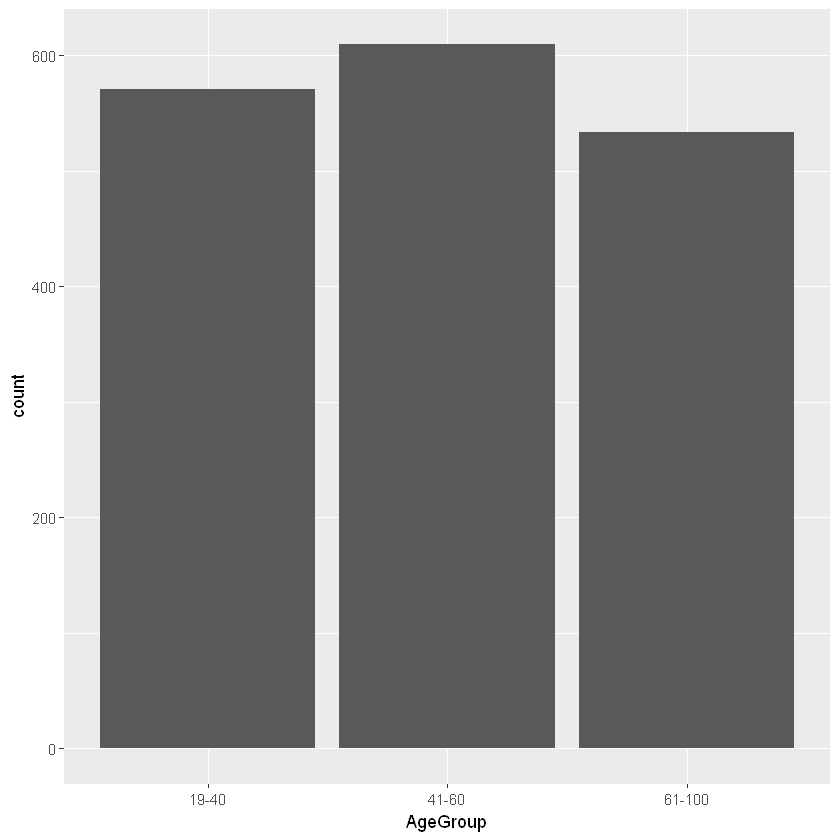

In [41]:
qplot(AgeGroup, data=date, geom="bar", width=0.2, fill=date1a)

<b>Observation :</b>  People in the middle-aged group i.e 41-60 use the online datinng site the most.

--------------------------------------------------------------------------------------------------------------------------------

<b>Question 5:</b> How does smartphones ownership depend on Income and Locality?

<b>Hypothesis:</b> Smartphones ownership should be more with individuals of higher income and individuals in the suburban area.

In [42]:
smart<-sqldf("select inc, (case when smart1=1 then 'Yes' when smart1=2 then 'No' end) as smartphones ,
(case when usr='U' then 'urban' when usr='S' then 'suburban' when usr='R' then 'rural' end) as Locality
from data where smart1!=8 and smart1!=9 and inc!=98 and inc!=99")

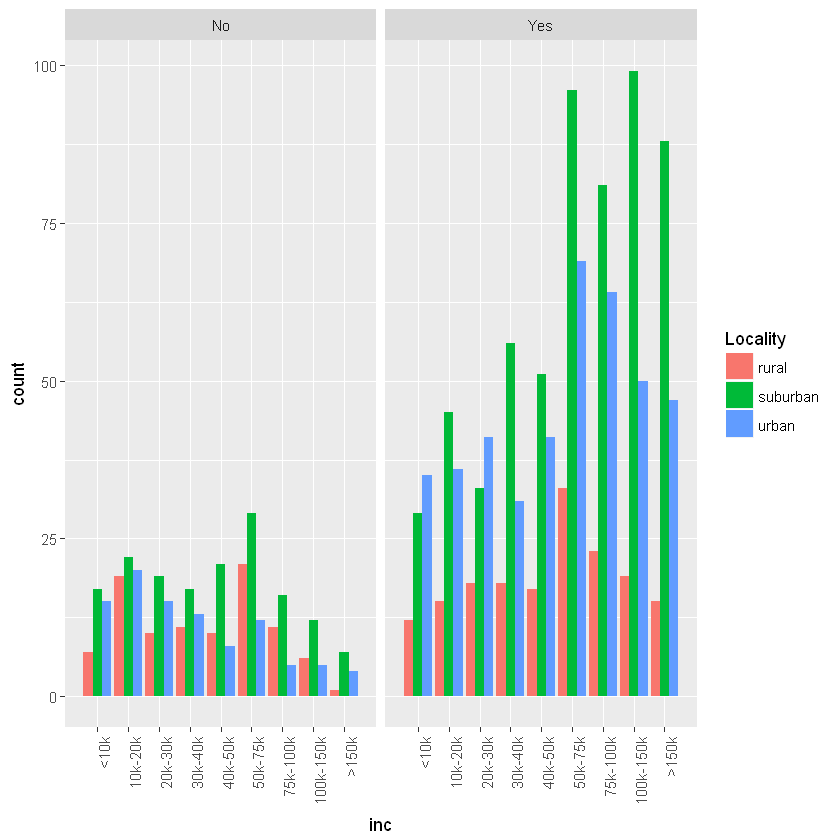

In [43]:
ggplot(smart, aes(inc, fill =Locality)) +scale_x_discrete(limits=c("1","2","3","4","5","6","7","8","9"),labels=c("<10k","10k-20k","20k-30k","30k-40k","40k-50k","50k-75k","75k-100k","100k-150k",">150k"))+
  geom_bar(position = "dodge")+facet_grid(~smartphones)+theme(axis.text.x = element_text(angle = 90, hjust = 1))

<b>Observation :</b> As we can see from the graph smartphones usage is more with people of income higher than $50k and in the suburban areas as compared to people with lower income and in rural and urban areas.

--------------------------------------------------------------------------------------------------------------------------------

<b>Question 6:</b> What are the political views of different races in the United States?

<b>Hypothesis:</b> Whites should be supporting Republican party and Blacks and Asians should not be supporting Republican party.

In [44]:
party<-sqldf("select (case when PARTY=1 then 'Republican'
when PARTY=2 then 'Democrat' when PARTY=3 OR PARTY=5 then 'Independent/Others' 
when PARTY=4 OR PARTY=8 OR PARTY=9 then'No reviews' end) as political_party,
  (case when race=1 then  'white' 
 when race=2 then  'black'
  when race=3 then 'asian'
  when race=4 then 'mixed'
  when race=5 then 'nativeAmerican'
   when race=6 then 'others' end) as Race
from data where Race!='NA' ")

Warning message:
"Removed 54 rows containing non-finite values (stat_count)."

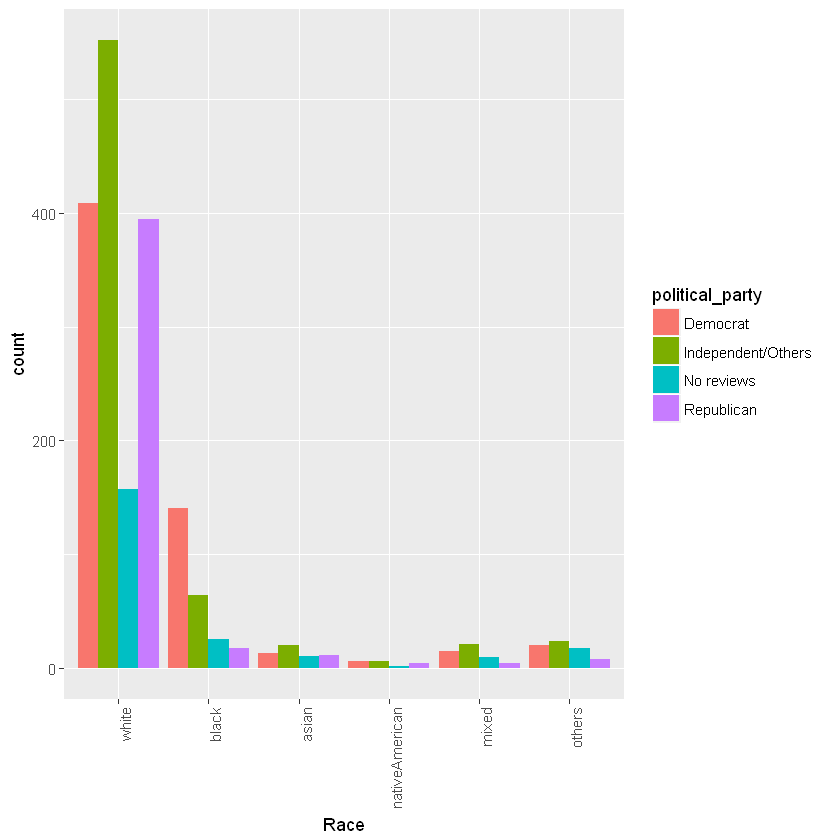

In [45]:
ggplot(party, aes(Race, fill =political_party)) +
geom_bar(position = "dodge")+scale_x_discrete(limits=c("white","black","asian","nativeAmerican","mixed","others"))+theme(axis.text.x = element_text(angle = 90, hjust = 1))

<b>Observation :</b>  From the graph we see that definitely less Blacks support Republican party but Whites and Asians have equal support for both the parties(Republican and Democrat)

--------------------------------------------------------------------------------------------------------------------------------